In [39]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import dates as mat_dates
import numpy as np
import seaborn as sns

from matplotlib import dates as mat_dates
from matplotlib.ticker import FuncFormatter, PercentFormatter
import math
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', '{:.2f}'.format)


### read data

In [2]:
# Read in the data
INPUT_DIR = '../input/m5-forecasting-accuracy'
calendar_df = pd.read_csv(f'{INPUT_DIR}/calendar.csv')
sales_df = pd.read_csv(f'{INPUT_DIR}/sales_train_validation.csv')
prices_df = pd.read_csv(f'{INPUT_DIR}/sample_submission.csv')

In [3]:
print('shape of calendar_df is ',calendar_df.shape)
print('top 2 rows of calendar_df')
calendar_df.head(2)

shape of calendar_df is  (1969, 14)
top 2 rows of calendar_df


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0


In [4]:
print('shape of sales_df is ',sales_df.shape)
print('top 2 rows of sales_df')
sales_df.head(2)

shape of sales_df is  (30490, 1919)
top 2 rows of sales_df


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
print('shape of prices_df is ',prices_df.shape)
print('top 2 rows of prices_df')
prices_df.head(2)

shape of prices_df is  (60980, 29)
top 2 rows of prices_df


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
daily_overallsales = sales_df.loc[:,'d_1':'d_1913'].aggregate(['sum'])
daily_overallsales = daily_overallsales.T.reset_index()
daily_overallsales.rename(columns={'sum':'Total_Sales','index':'d'}, inplace=True)


In [7]:
daily_overallsales=daily_overallsales.merge(calendar_df,how='left',on='d')
daily_overallsales.head(2)

,d,Total_Sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,32631,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,d_2,31749,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0


In [8]:
daily_overallsales=daily_overallsales[['Total_Sales','date']]
daily_overallsales['date']=pd.to_datetime(daily_overallsales['date'])
daily_overallsales.head(2)

,Total_Sales,date
0,32631,2011-01-29
1,31749,2011-01-30


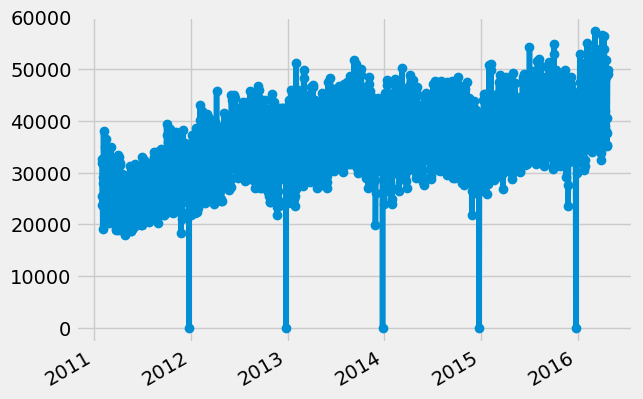

In [9]:
daily_overallsales['date'] = pd.to_datetime(daily_overallsales['date'])
daily_dates = daily_overallsales['date']
daily_totalSales = daily_overallsales['Total_Sales']


plt.style.use('fivethirtyeight')
plt.plot_date(daily_dates,daily_totalSales,linestyle='solid')
plt.gcf().autofmt_xdate() 



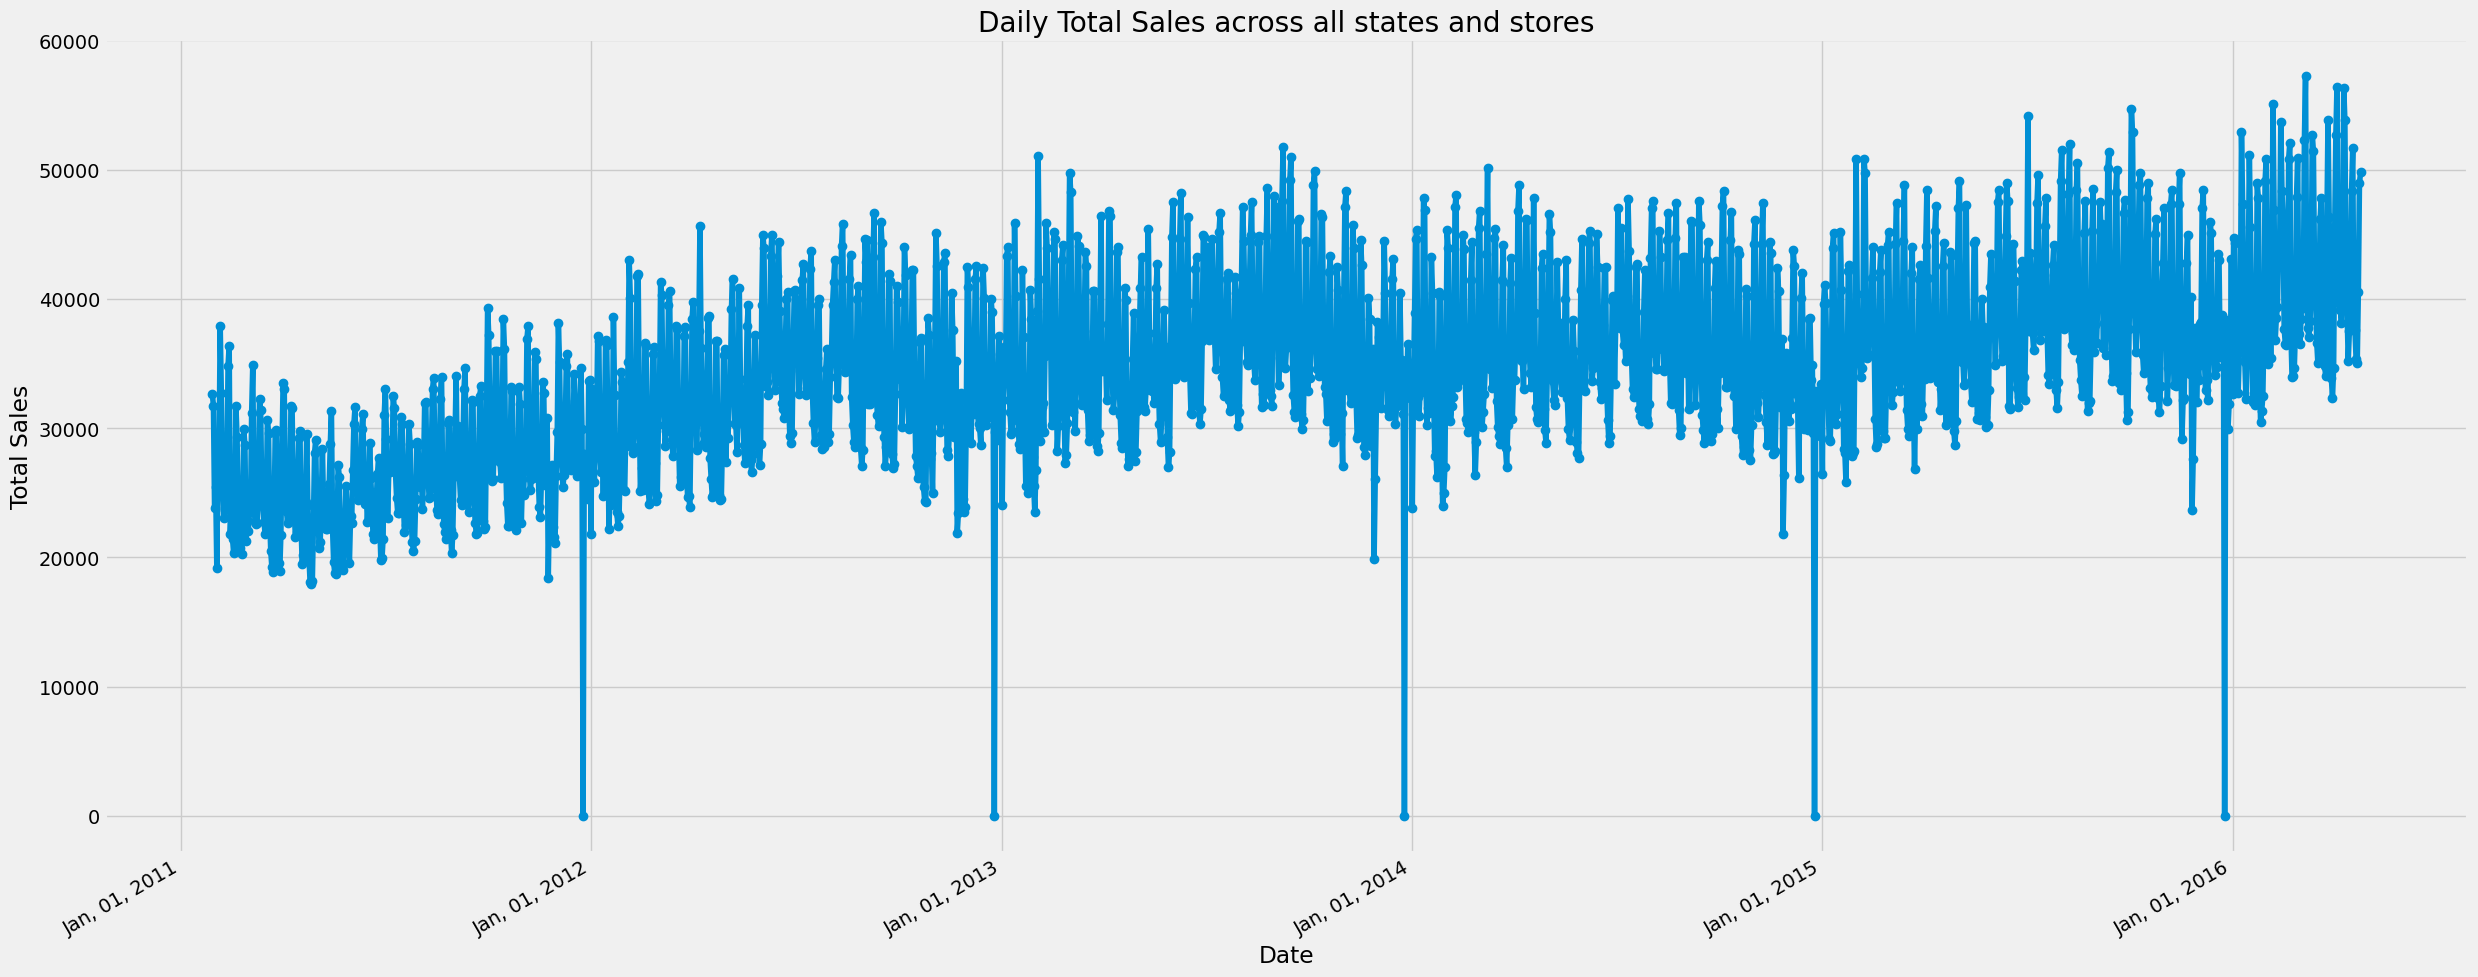

In [10]:

plt.style.use('fivethirtyeight')
plt.plot_date(daily_dates,daily_totalSales,linestyle='solid')
plt.gcf().autofmt_xdate() 
date_format = mat_dates.DateFormatter('%b, %d, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().set_size_inches(25, 10)
plt.title('Daily Total Sales across all states and stores')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [11]:
daily_overallsales['year'] = daily_overallsales['date'].dt.year
daily_overallsales_grp = daily_overallsales.groupby(['year'])
daily_overallsales_grp.head(2)
gf=daily_overallsales_grp.groups


/tmp/ipykernel_28/77284588.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(daily_overallsales.iloc[gf_val_lst[i]]['date'],daily_overallsales.iloc[gf_val_lst[i]]['Total_Sales']


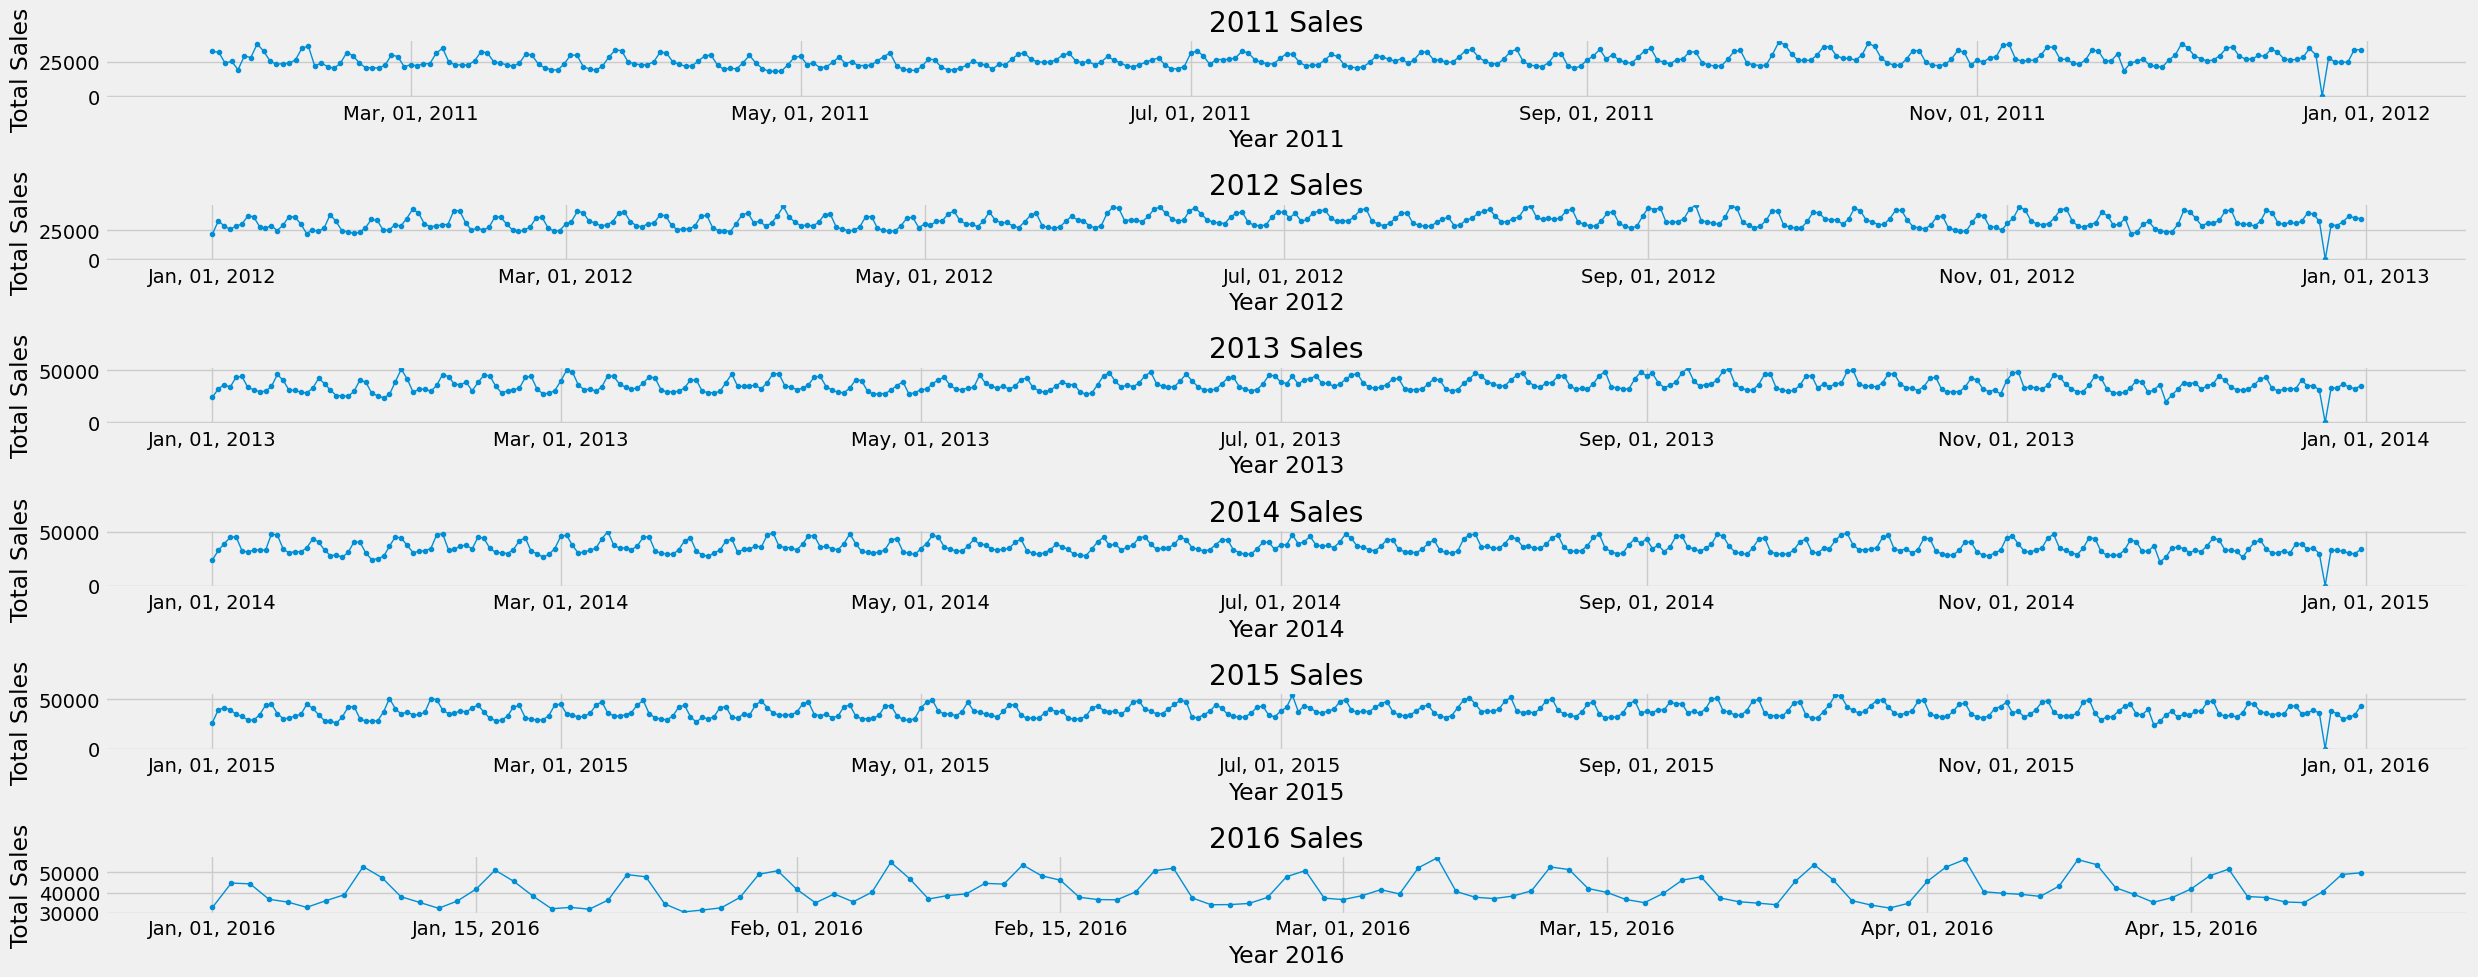

In [12]:
gf_val_lst=list(gf.values())
date_format=mat_dates.DateFormatter('%b, %d, %Y')
fig=plt.figure(figsize=(25,10))
for i,j in enumerate(gf):
    ax=plt.subplot(6,1,i+1)
    plt.plot_date(daily_overallsales.iloc[gf_val_lst[i]]['date'],daily_overallsales.iloc[gf_val_lst[i]]['Total_Sales']
                  ,linestyle='solid',linewidth=1,marker='.')

    
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().set_title(str(2011+i)+ ' Sales')
    plt.gca().set_xlabel('Year '+str(2011+i))
    plt.gca().set_ylabel('Total Sales')
    
plt.tight_layout()
plt.show()


In [13]:
daily_overallsales['month'] = daily_overallsales['date'].dt.month_name()
daily_overallsales_month = daily_overallsales.groupby(['month'])['Total_Sales'].sum()
daily_overallsales_month=daily_overallsales_month.reset_index()
fig=plt.figure()

<Figure size 640x480 with 0 Axes>

In [14]:
months_order = list(daily_overallsales['date'].dt.month_name().unique())
daily_overallsales_month.index = pd.CategoricalIndex(daily_overallsales_month.month, categories=months_order, ordered=True)
daily_overallsales_month = daily_overallsales_month.sort_index()
daily_overallsales_month.reset_index(drop=True,inplace=True)


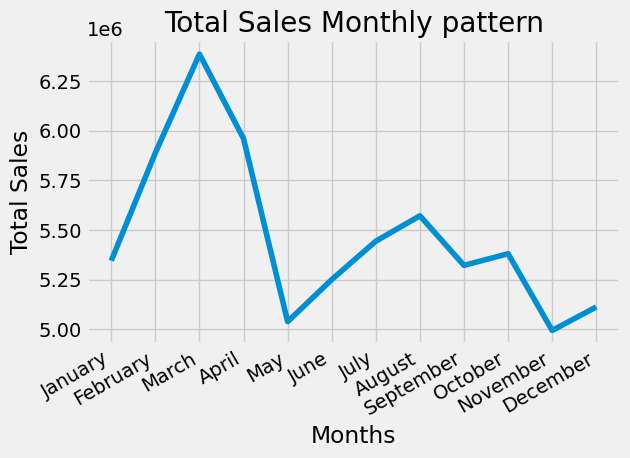

In [15]:

plt.plot(daily_overallsales_month['month'],daily_overallsales_month['Total_Sales'],linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Total Sales Monthly pattern')
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


In [16]:
daily_overallsales['day'] = daily_overallsales['date'].dt.day_name()
daily_overallsales_day = daily_overallsales.groupby(['day'])['Total_Sales'].sum()
daily_overallsales_day=daily_overallsales_day.reset_index()
fig=plt.figure()



<Figure size 640x480 with 0 Axes>

In [17]:
day_order = list(daily_overallsales['date'].dt.day_name().unique())
daily_overallsales_day.index = pd.CategoricalIndex(daily_overallsales_day.day, categories=day_order, ordered=True)
daily_overallsales_day = daily_overallsales_day.sort_index()

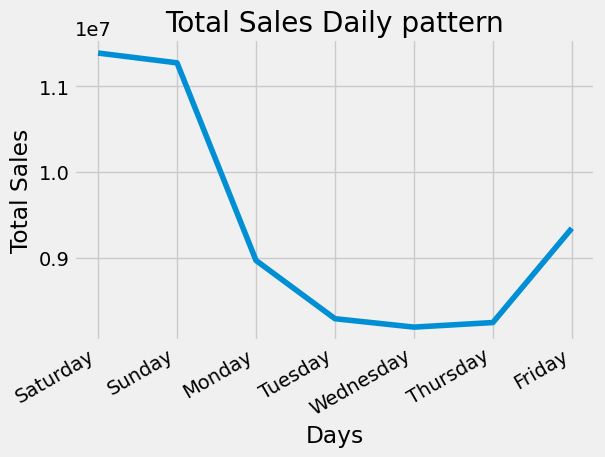

In [18]:
plt.plot(daily_overallsales_day['day'],daily_overallsales_day['Total_Sales'],linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Total Sales Daily pattern')
plt.xlabel('Days')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [19]:
sales_grp_st=sales_df.groupby(['state_id'])
st_grp=sales_grp_st.groups
states_overallSales =[]
states=[]
for i , st in enumerate(st_grp):
    st_df=sales_df.iloc[st_grp[st]]
    st_sales=st_df.loc[:,'d_1':'d_1913']
    st_sales=int(st_sales.aggregate(['sum']).T.sum().values);
    states.append(st)
    states_overallSales.append(st_sales)




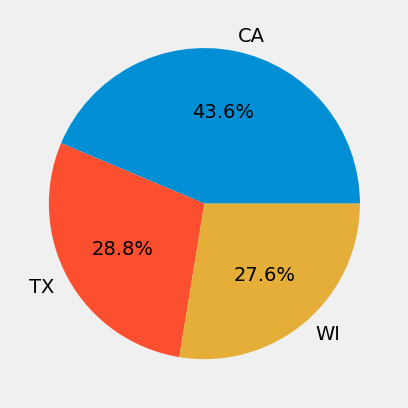

In [20]:
plt.pie(states_overallSales,labels=states,autopct='%1.1f%%');


In [21]:
""" Here we get sales Proportion from each store """
sales_store_grp = sales_df.groupby('store_id')
sales_store_grp_idx = list(sales_store_grp.groups.values())
stores_ky = list(sales_store_grp.groups.keys())
stores = []
store_sales = []
for i in range(len(stores_ky)):
    stores.append(stores_ky[i])
    store_df = sales_df.iloc[sales_store_grp_idx[i]]
    store_sales.append(int(store_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values.item()))



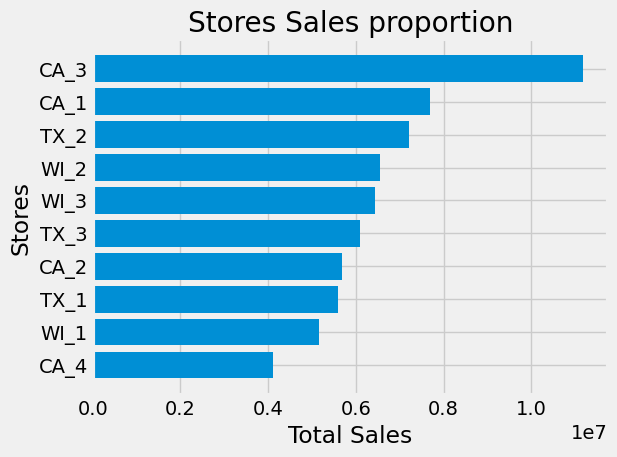

In [22]:
"""plot of sales Proportion from each store"""
stores = list(np.asarray(stores)[np.argsort(np.asarray(store_sales))])
store_sales = list(np.asarray(store_sales)[np.argsort(np.asarray(store_sales))])
plt.barh(stores,store_sales)
plt.title('Stores Sales proportion')
plt.xlabel('Total Sales')
plt.ylabel('Stores')
plt.tight_layout()
plt.show()

In [23]:
""" Here we get sales Proportion from each product category """
sales_cat_grp = sales_df.groupby('cat_id')
sales_cat_grp_idx = list(sales_cat_grp.groups.values())
cat_ky = list(sales_cat_grp.groups.keys())
prod_cats = []
prod_cats_sales = []
for i in range(len(cat_ky)):
    prod_cats.append(cat_ky[i])
    cat_df = sales_df.iloc[sales_cat_grp_idx[i]]
    prod_cats_sales.append(int(cat_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values.item()))



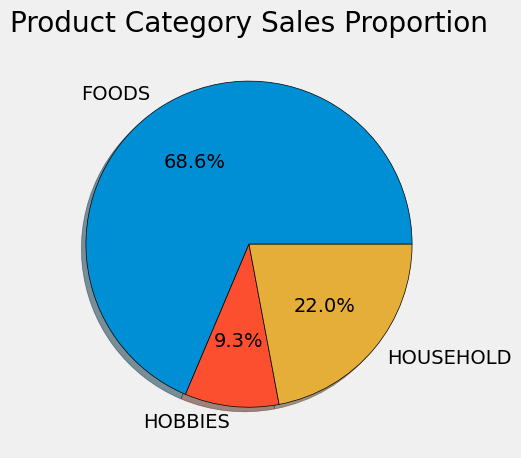

In [24]:
"""plot of sales Proportion from each product category"""
plt.pie(prod_cats_sales,labels=prod_cats,shadow=True,
        autopct = '%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.title('Product Category Sales Proportion')
plt.tight_layout()
plt.show()


In [25]:
""" Here we get sales Proportion from each department """
sales_dpt_grp = sales_df.groupby('dept_id')
sales_dpt_grp_idx = list(sales_dpt_grp.groups.values())
dept_ky = list(sales_dpt_grp.groups.keys())
depts = []
dept_sales = []
for i in range(len(dept_ky)):
    depts.append(dept_ky[i])
    dept_df = sales_df.iloc[sales_dpt_grp_idx[i]]
    dept_sales.append(int(dept_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values.item()))



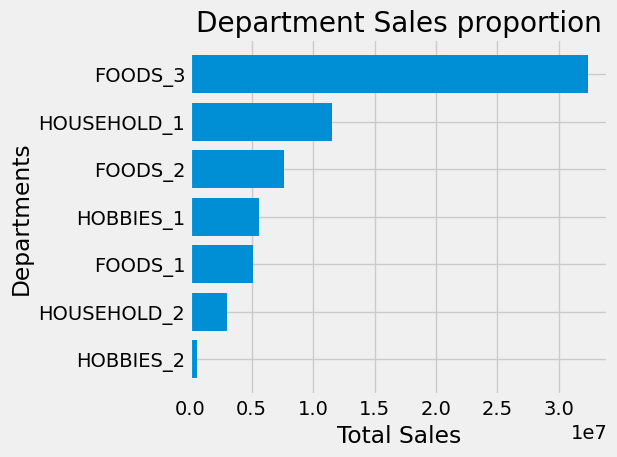

In [26]:
"""plot of sales Proportion from each department"""
depts = list(np.asarray(depts)[np.argsort(np.asarray(dept_sales))])
dept_sales = list(np.asarray(dept_sales)[np.argsort(np.asarray(dept_sales))])
plt.barh(depts,dept_sales)
plt.title('Department Sales proportion')
plt.xlabel('Total Sales')
plt.ylabel('Departments')
plt.tight_layout()
plt.show()

In [27]:
from collections import defaultdict
sales_cat_state_grp = sales_df.groupby(['cat_id', 'state_id'])
# print(sales_cat_state_grp.head(2))
sales_data = defaultdict(list)
categories = []

for (cat, state), group in sales_cat_state_grp:
    if cat not in categories:
        categories.append(cat)
    
    total_sales = group.loc[:, 'd_1':'d_1913'].sum().sum()
    
    sales_data[state].append(total_sales)



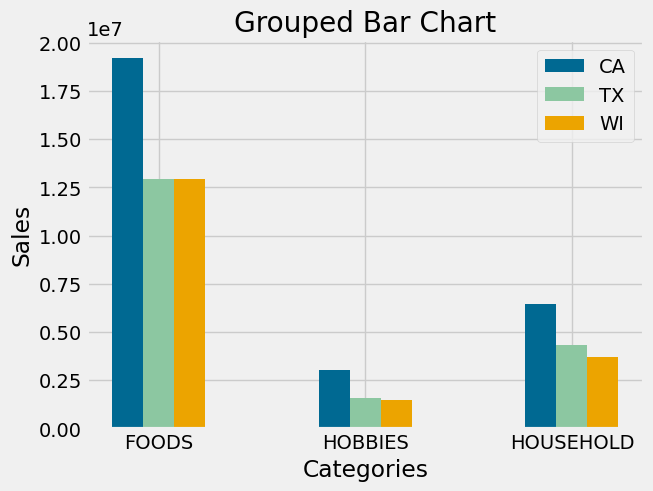

In [28]:
num_categories = len(categories)
width = 0.15  # Adjust the width as needed
x = np.arange(num_categories)
colors = ['#006992', '#8cc7a1', '#ECA400']

# Create a grouped bar chart using a loop
for i, (state, data) in enumerate(sales_data.items()):
    plt.bar(x + i * width, data, width=width, label=state, color=colors[i])

# Customize the X-axis labels
plt.xticks(x + (num_categories - 1) * width / 2, categories)

# Add legend and labels
plt.legend()
plt.xlabel("Categories")
plt.ylabel("Sales")
plt.title("Grouped Bar Chart")

# Show the plot
plt.show()

/tmp/ipykernel_28/56640666.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


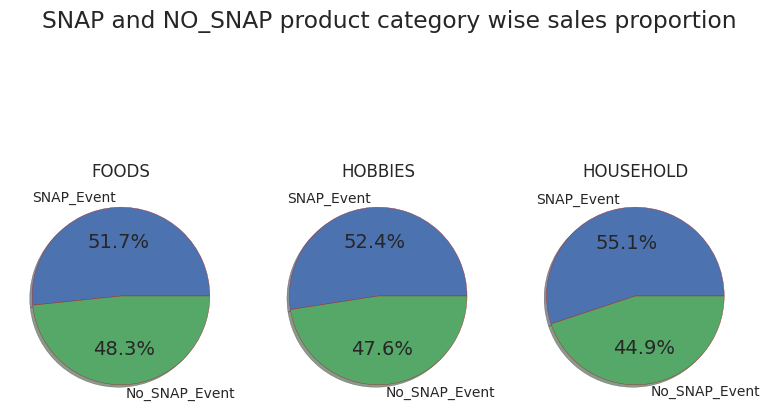

In [29]:
"""Group by cat_id for the sales proportion of each product category wrt SNAP Vs Non-SNAP days"""

sales_cat_grp = sales_df.groupby(['cat_id'])
sales_cat_grp_idx = list(sales_cat_state_grp.groups.values())
snap_cat_sales = defaultdict(dict)

for i in range(len(cat_ky)):
    sales_cat_grp_df = sales_df.iloc[sales_cat_grp_idx[i]].loc[:,'d_1':'d_1913']
    sales_cat_grp_df = pd.melt(sales_cat_grp_df,var_name='d',value_name='sales')
    sales_cat_grp_df = sales_cat_grp_df.merge(calendar_df,on='d',how='left')
    
    snap_cat_sales[cat_ky[i]]['Total_Sales'] = int(sales_cat_grp_df[['sales']].sum().values.item())
    snap_cat_sales[cat_ky[i]]['SNAP_Sales'] = int(sales_cat_grp_df[(sales_cat_grp_df['snap_CA'] == 1) |(sales_cat_grp_df['snap_TX'] == 1)|(sales_cat_grp_df['snap_WI'] == 1)]['sales'].sum())
""" Plot of  sales proportion of each product category wrt SNAP Vs Non-SNAP days """

plt.style.use('seaborn')
labels = ['SNAP_Event', 'No_SNAP_Event']
snap_cat_sales_ky = list(snap_cat_sales.keys())
FOODS_sales = [snap_cat_sales['FOODS']['SNAP_Sales'], snap_cat_sales['FOODS']['Total_Sales'] - snap_cat_sales['FOODS']['SNAP_Sales']]
HOBBIES_sales = [snap_cat_sales['HOBBIES']['SNAP_Sales'], snap_cat_sales['HOBBIES']['Total_Sales'] - snap_cat_sales['HOBBIES']['SNAP_Sales']]
HOUSEHOLD_sales = [snap_cat_sales['HOUSEHOLD']['SNAP_Sales'], snap_cat_sales['HOUSEHOLD']['Total_Sales'] - snap_cat_sales['HOUSEHOLD']['SNAP_Sales']]

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)

fig.suptitle('SNAP and NO_SNAP product category wise sales proportion')

ax1.pie(FOODS_sales,labels = labels, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax1.set_title(snap_cat_sales_ky[0])

ax2.pie(HOBBIES_sales,labels = labels, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax2.set_title(snap_cat_sales_ky[1])

ax3.pie(HOUSEHOLD_sales,labels = labels, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax3.set_title(snap_cat_sales_ky[2])

plt.tight_layout()
plt.show()

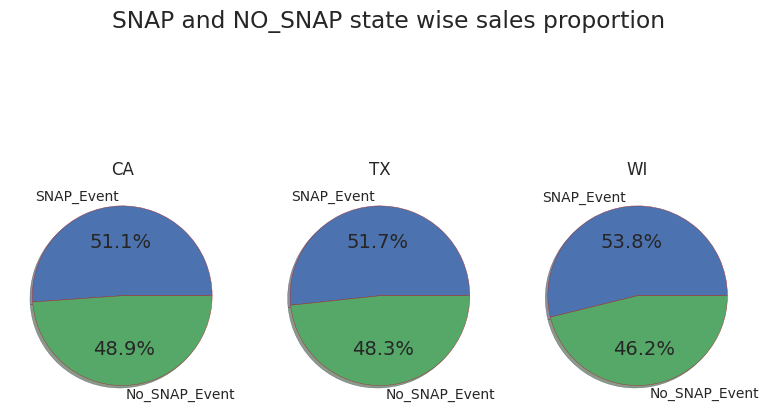

In [30]:
"""Group by state_id for the sales proportion of each state wrt SNAP Vs Non-SNAP days"""
sales_st_grp=sales_df.groupby(['state_id'])
sales_st_grp_idx=list(sales_st_grp.groups.values())
state_ky = list(sales_st_grp.groups.keys())
snap_state_sales = {}
for i in range(len(state_ky)):
    sales_state_grp_df = sales_df.iloc[sales_st_grp_idx[i]].loc[:,'d_1':'d_1913']
    sales_state_grp_df = pd.melt(sales_state_grp_df,var_name='d',value_name='sales')
    sales_state_grp_df = sales_state_grp_df.merge(calendar_df,on='d',how='left')
    snap_state_sales[state_ky[i]] = {}
    snap_state_sales[state_ky[i]]['Total_Sales'] = int(sales_state_grp_df[['sales']].sum().values)
    snap_state_sales[state_ky[i]]['SNAP_Sales'] = int(sales_state_grp_df[(sales_state_grp_df['snap_CA'] == 1) |(sales_state_grp_df['snap_TX'] == 1)|(sales_state_grp_df['snap_WI'] == 1)]['sales'].sum())

"""Plot of sales proportion of each state wrt SNAP Vs Non-SNAP days"""

labels = ['SNAP_Event', 'No_SNAP_Event']
snap_state_sales_ky = list(snap_state_sales.keys())
CA_sales = [snap_state_sales['CA']['SNAP_Sales'], snap_state_sales['CA']['Total_Sales'] - snap_state_sales['CA']['SNAP_Sales']]
TX_sales = [snap_state_sales['TX']['SNAP_Sales'], snap_state_sales['TX']['Total_Sales'] - snap_state_sales['TX']['SNAP_Sales']]
WI_sales = [snap_state_sales['WI']['SNAP_Sales'], snap_state_sales['WI']['Total_Sales'] - snap_state_sales['WI']['SNAP_Sales']]

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)

fig.suptitle('SNAP and NO_SNAP state wise sales proportion')

ax1.pie(CA_sales,labels = labels, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax1.set_title(snap_state_sales_ky[0])

ax2.pie(TX_sales,labels = labels, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax2.set_title(snap_state_sales_ky[1])

ax3.pie(WI_sales,labels = labels, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax3.set_title(snap_state_sales_ky[2])

plt.tight_layout()
plt.show()

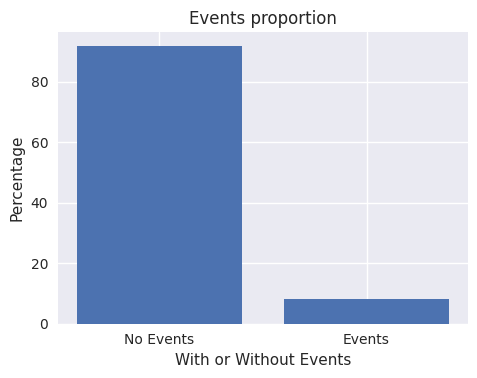

In [31]:
"""Here we get number of days with and without events and plot the distribution"""
df = calendar_df[['event_name_1']]
no_event_per = ((len(df) - int(df.count().item()))/len(df))*100
event_per = (int(df.count().item())/len(df))*100

event_lst = [('No Events',no_event_per),('Events',event_per)]
events = [x[0] for x in event_lst]
events_count = [x[1] for x in event_lst]

plt.figure(figsize=(5,4))
plt.bar(events,events_count)
plt.title('Events proportion')
plt.xlabel('With or Without Events')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

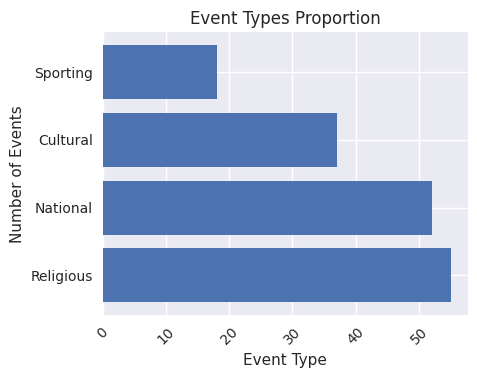

  event_type_1  count
0    Religious     55
1     National     52
2     Cultural     37
3     Sporting     18


In [32]:


event_type = calendar_df['event_type_1'].value_counts().reset_index()


plt.figure(figsize=(5, 4))

event_types = event_type['event_type_1']
event_counts = event_type['count']

plt.barh(event_types, event_counts)
plt.title('Event Types Proportion')
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

print(event_type)


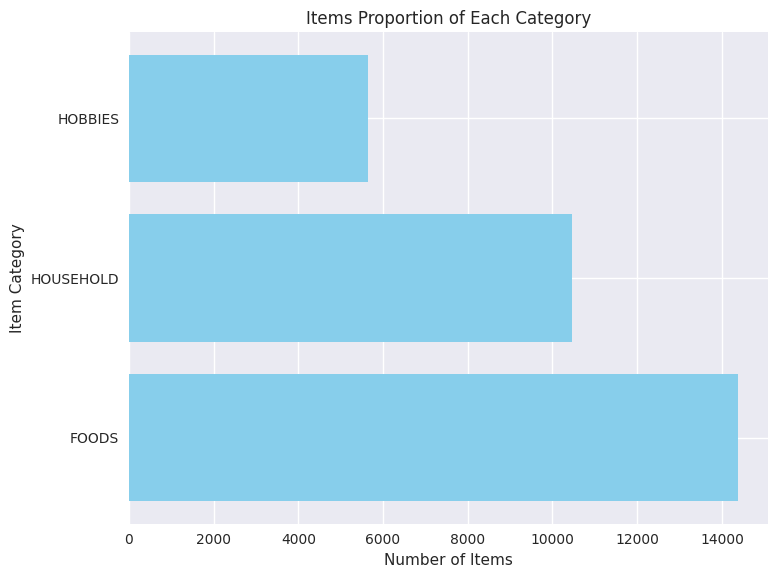

In [33]:
cat_item_counts = sales_df['cat_id'].value_counts().reset_index()

cat_item_counts.columns = ['Item Category', 'Number of Items']

cat_item_counts = cat_item_counts.sort_values(by='Number of Items', ascending=False)


# Plotting
plt.figure(figsize=(8, 6))
plt.barh(cat_item_counts['Item Category'], cat_item_counts['Number of Items'], color='skyblue')
plt.title('Items Proportion of Each Category')
plt.xlabel('Number of Items')
plt.ylabel('Item Category')
plt.tight_layout()
plt.show()

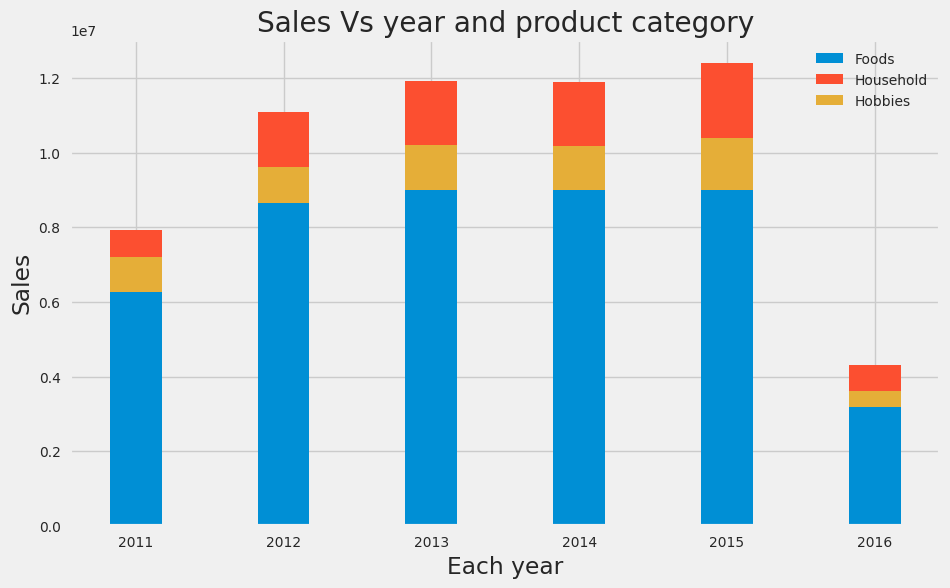

In [34]:
"""Here we get sales proportion of each product category for each year """
sales_cat = {}
sales_cat_grp = sales_df.groupby('cat_id')
sales_cat_grp_idx = list(sales_cat_grp.groups.values())
cat_ky = list(sales_cat_grp.groups.keys())
for i in range(len(cat_ky)):
    sales_cat_df = pd.melt(sales_df.iloc[sales_cat_grp_idx[i]].loc[:,'d_1':'d_1913'],var_name='d',value_name='sales').merge(calendar_df,on='d',how='left')
    sales_cat_yr_grp = sales_cat_df.groupby('year').groups
    sales_cat_yr_idx = list(sales_cat_yr_grp.values())
    sales_cat_yr_ky = list(sales_cat_yr_grp.keys())
    sales_cat[cat_ky[i]] = {}
    for j in range(len(sales_cat_yr_ky)):
        sales_cat[cat_ky[i]][sales_cat_yr_ky[j]] = sales_cat_df.iloc[sales_cat_yr_idx[j]]['sales'].sum()

"""plot of the sales proportion of each product category for each year """

#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html
N = 6
FOODS_sales = list(sales_cat['FOODS'].values())
HOBBIES_sales = list(sales_cat['HOBBIES'].values())
HOUSEHOLD_sales = list(sales_cat['HOUSEHOLD'].values())

ind = np.arange(N)    
width = 0.35   

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
p1 = plt.bar(ind, FOODS_sales, width)
p2 = plt.bar(ind, HOUSEHOLD_sales, width,bottom=FOODS_sales)
p3 = plt.bar(ind, HOBBIES_sales, width,bottom=FOODS_sales)

plt.xlabel('Each year')
plt.ylabel('Sales')
plt.title('Sales Vs year and product category')
plt.xticks(ind, (2011, 2012, 2013, 2014, 2015, 2016))
plt.legend((p1[0], p2[0], p3[0]), ('Foods', 'Household','Hobbies'))

plt.show()

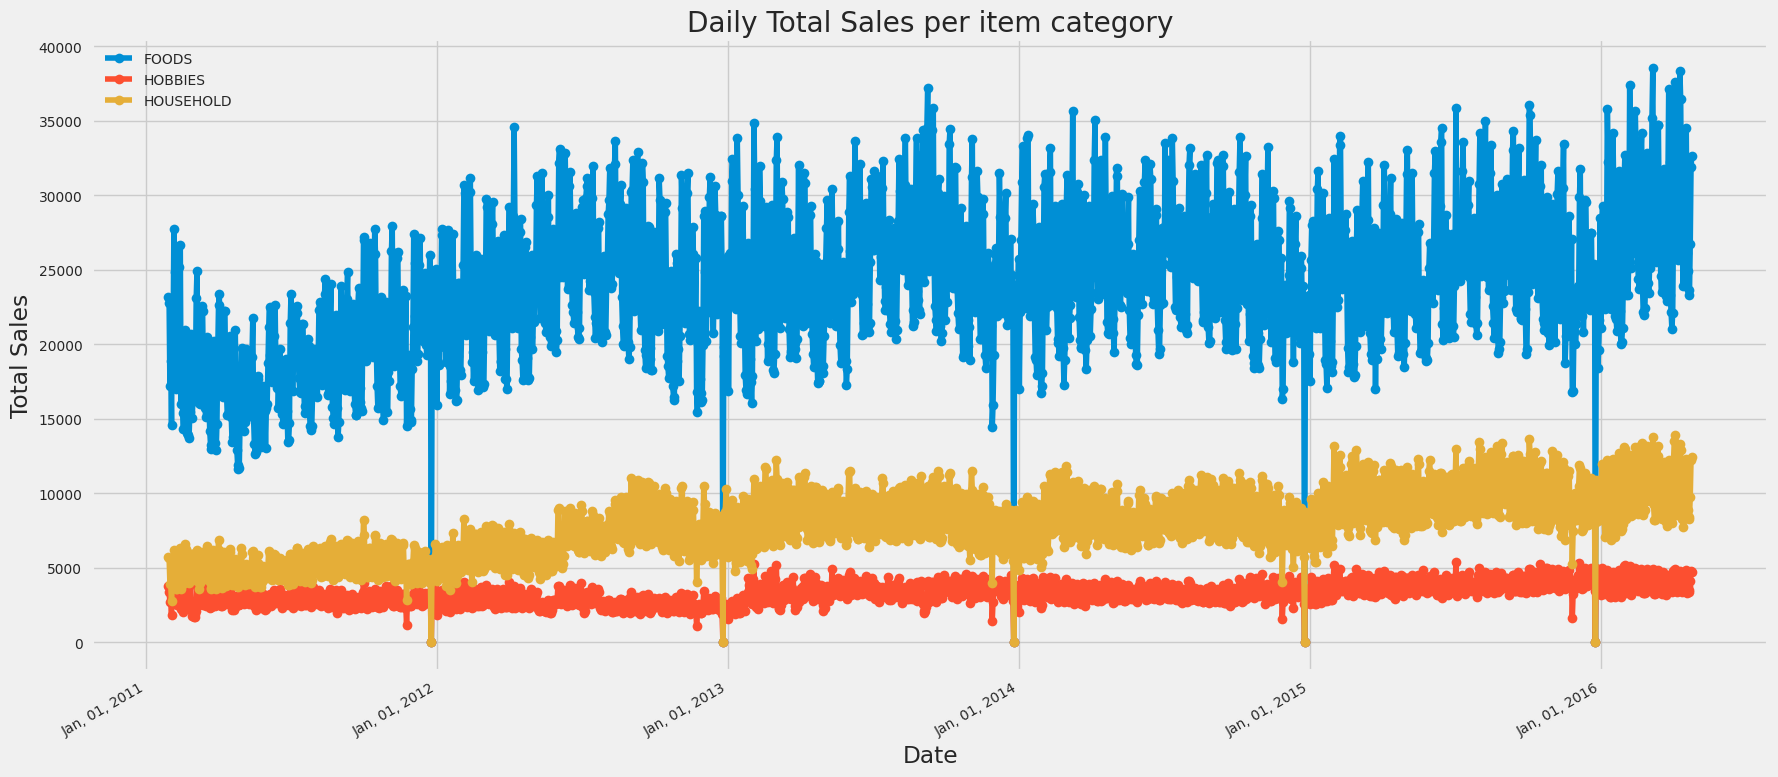

In [35]:
sales_cat=sales_df.groupby(['cat_id'])
for cat,cat_lst in sales_cat.groups.items():
    df =cat_df=sales_df.iloc[cat_lst].loc[:,'d_1':'d_1913'].sum().T.reset_index()
    df.rename(columns=dict(zip(df.columns, ['d','Total_Sales'])), inplace=True)
    df=df.merge(calendar_df,on='d',how='left')
    item_dates = pd.to_datetime(df['date'])
    item_totalSales = df['Total_Sales']
    plt.plot_date(item_dates,item_totalSales,linestyle='solid',label=cat)
    plt.gcf().autofmt_xdate()
    date_format=mat_dates.DateFormatter('%b, %d, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gcf().set_size_inches(18, 8)
    
plt.title('Daily Total Sales per item category')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

resourses
1-https://github.com/bharanish/M5/blob/main/M5_EDA.ipynb
2-https://medium.com/analytics-vidhya/m5-forecasting-accuracy-ad0d01a79b8e
